In [1]:
import sys
import numpy as np
sys.path.insert(0, '../model_functions')
import primary_model as pm
import importlib
importlib.reload(pm)

<module 'primary_model' from '../model_functions/primary_model.py'>

In [2]:
data_path = "../../data/cull%i/model_data/" % 1

devtest_aa_dict = np.load(data_path + 'devtest_aa_dict.npy')[()]
devtest_cmap_dict = np.load(data_path + 'devtest_cmap_dict.npy')[()]
train_aa_dict = np.load(data_path + 'train_aa_dict.npy')[()]
train_cmap_dict = np.load(data_path + 'train_cmap_dict.npy')[()]
valid_aa_dict = np.load(data_path + 'valid_aa_dict.npy')[()]
valid_cmap_dict = np.load(data_path + 'valid_cmap_dict.npy')[()]

In [5]:
model = pm.create_architecture(3, 6)

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, None, 20)     0                                            
__________________________________________________________________________________________________
1d_convnet_layer1a (Conv1D)     (None, None, 20)     6820        input_layer[0][0]                
__________________________________________________________________________________________________
1d_convnet_batch_norm1a (BatchN (None, None, 20)     80          1d_convnet_layer1a[0][0]         
__________________________________________________________________________________________________
1d_convnet_layer1b (Conv1D)     (None, None, 20)     6820        1d_convnet_batch_norm1a[0][0]    
__________________________________________________________________________________________________
1d_convnet

In [7]:
model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        sample_weight_mode="temporal",
        metrics=['accuracy']
    )

In [8]:
history = model.fit_generator(
        pm.aa_generator(train_aa_dict, train_cmap_dict),
        validation_data=pm.aa_generator(valid_aa_dict, valid_cmap_dict),
        steps_per_epoch=5, 
        epochs=2,
        validation_steps=1,
        callbacks=pm.callbacks_list
    )

/Users/jinli/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
4/5 [=======================>......] - ETA: 3s - loss: 4.5926 - acc: 0.5902
Epoch 00001: val_loss improved from inf to 5.18052, saving model to best_weight/Double_Resid_Network_weights.best.hdf5

Consider using a TensorFlow optimizer from `tf.train`.
5/5 [==============================] - 23s 5s/step - loss: 4.4899 - acc: 0.6004 - val_loss: 5.1805 - val_acc: 0.5830
Epoch 2/2
4/5 [=======================>......] - ETA: 10s - loss: 3.7129 - acc: 0.6658
Epoch 00002: val_loss did not improve from 5.18052

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
5/5 [==============================] - 43s 9s/step - loss: 3.7026 - acc: 0.6559 - val_loss: 5.2892 - val_acc: 0.5433


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
test = train_cmap_dict['1a0i']

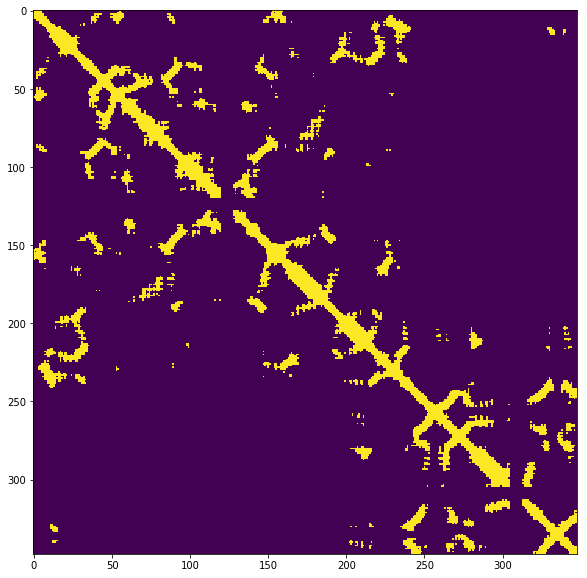

In [19]:
# sns.heatmap(test.astype(int))
plt.figure(figsize=(20,10))
plt.imshow(test,)